In [81]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

crashes = pd.read_csv('dataset/crashes_severity_2017.csv')
people = pd.read_csv('dataset/people_2017.csv')
vehicles = pd.read_csv('dataset/vehicles_2017.csv')

In [2]:
crashes.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845250 entries, 0 to 845249
Data columns (total 52 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CRASH_RECORD_ID                   845250 non-null  object 
 1   CRASH_DATE                        845250 non-null  object 
 2   POSTED_SPEED_LIMIT                845250 non-null  int64  
 3   WEATHER_SEVERITY                  845250 non-null  int64  
 4   LIGHTING_SEVERITY                 845250 non-null  int64  
 5   FIRST_CRASH_TYPE                  845250 non-null  object 
 6   TRAFFICWAY_TYPE                   845250 non-null  object 
 7   ALIGNMENT                         845250 non-null  object 
 8   ROADWAY_SEVERITY                  845250 non-null  int64  
 9   CRASH_TYPE                        845250 non-null  object 
 10  DAMAGE_SEVERITY                   845250 non-null  int64  
 11  PRIM_CONTRIBUTORY_CAUSE           845250 non-null  o

In [3]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440782 entries, 0 to 1440781
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1440782 non-null  object 
 1   PERSON_TYPE            1440782 non-null  object 
 2   CRASH_RECORD_ID        1440782 non-null  object 
 3   VEHICLE_ID             1440122 non-null  float64
 4   CRASH_DATE             1440782 non-null  object 
 5   CITY                   1091527 non-null  object 
 6   STATE                  1077638 non-null  object 
 7   ZIPCODE                1023578 non-null  object 
 8   SEX                    1440782 non-null  float64
 9   AGE                    1043579 non-null  float64
 10  DRIVERS_LICENSE_STATE  1084697 non-null  object 
 11  DRIVERS_LICENSE_CLASS  895776 non-null   object 
 12  INJURY_CLASSIFICATION  1440782 non-null  object 
 13  DRIVER_ACTION          1440782 non-null  object 
 14  DRIVER_VISION     

In [4]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726332 entries, 0 to 1726331
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   CRASH_UNIT_ID        int64  
 1   CRASH_RECORD_ID      object 
 2   VEHICLE_ID           float64
 3   CRASH_DATE           object 
 4   UNIT_NO              int64  
 5   UNIT_TYPE            object 
 6   NUM_PASSENGERS       float64
 7   VEHICLE_YEAR         float64
 8   VEHICLE_DEFECT       object 
 9   VEHICLE_TYPE         object 
 10  MANEUVER             object 
 11  OCCUPANT_CNT         float64
 12  FIRST_CONTACT_POINT  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 171.2+ MB


## Date Distribution for crashes

In [5]:
crashes['CRASH_DATE'] = pd.to_datetime(crashes['CRASH_DATE'])

In [6]:
crashes['CRASH_YEAR'] = crashes['CRASH_DATE'].dt.year
crashes['CRASH_MONTH'] = crashes['CRASH_DATE'].dt.month
crashes['CRASH_DAY'] = crashes['CRASH_DATE'].dt.day
crashes['CRASH_HOUR'] = crashes['CRASH_DATE'].dt.hour
crashes['CRASH_DAY_OF_WEEK'] = crashes['CRASH_DATE'].dt.dayofweek

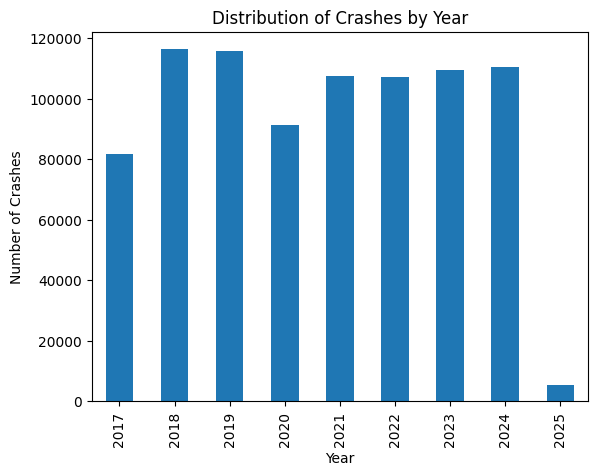

In [7]:
# distribution of crashes by year
crashes['CRASH_YEAR'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.show()


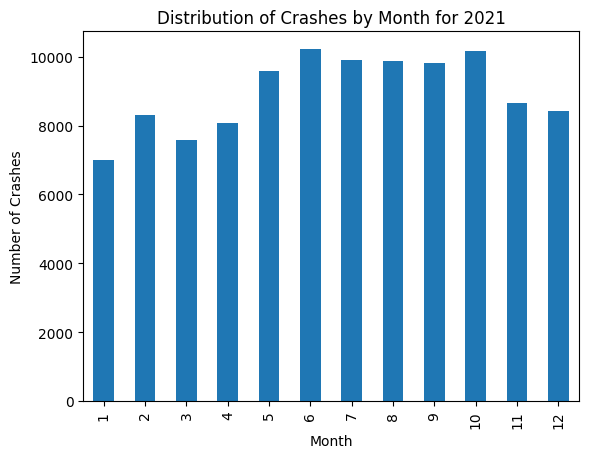

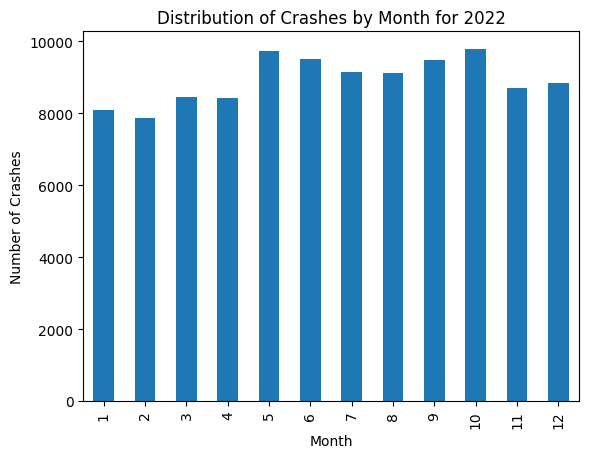

In [8]:
# filter crashes for the year 2021
crashes_2021 = crashes[crashes['CRASH_YEAR'] == 2021]

# distribution of crashes by month for 2021
crashes_2021['CRASH_MONTH'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Crashes by Month for 2021')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.show()

# filter crashes for the year 2022
crashes_2021 = crashes[crashes['CRASH_YEAR'] == 2022]

# distribution of crashes by month for 2022
crashes_2021['CRASH_MONTH'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Crashes by Month for 2022')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.show()


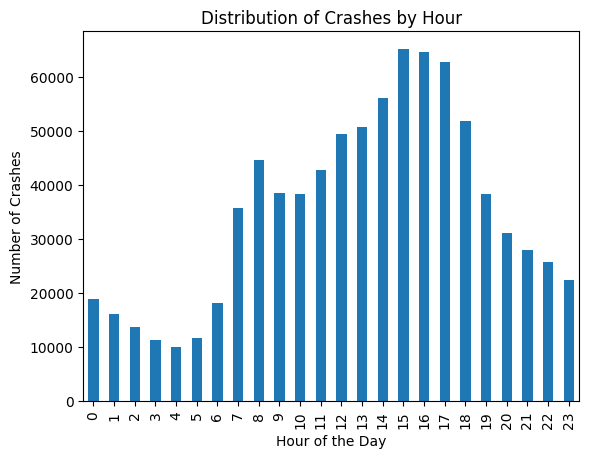

In [9]:
# Plot the distribution of crashes by hour
crashes['CRASH_HOUR'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Crashes by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.show()

<Figure size 1400x800 with 0 Axes>

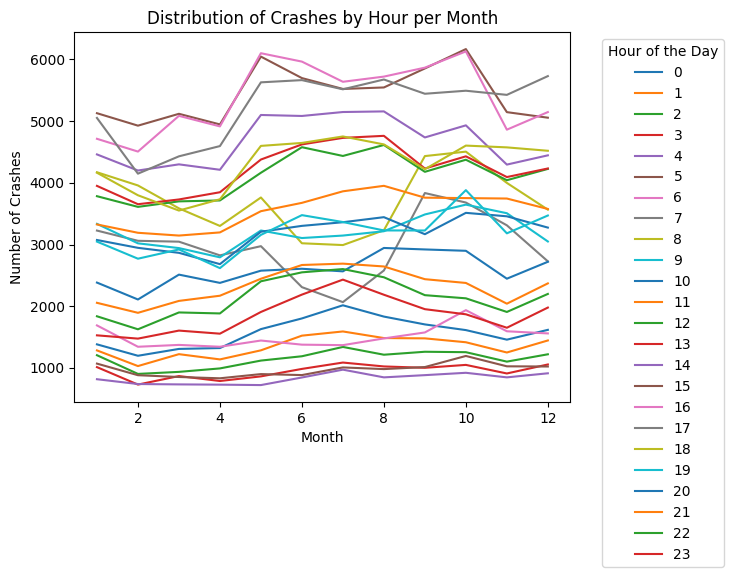

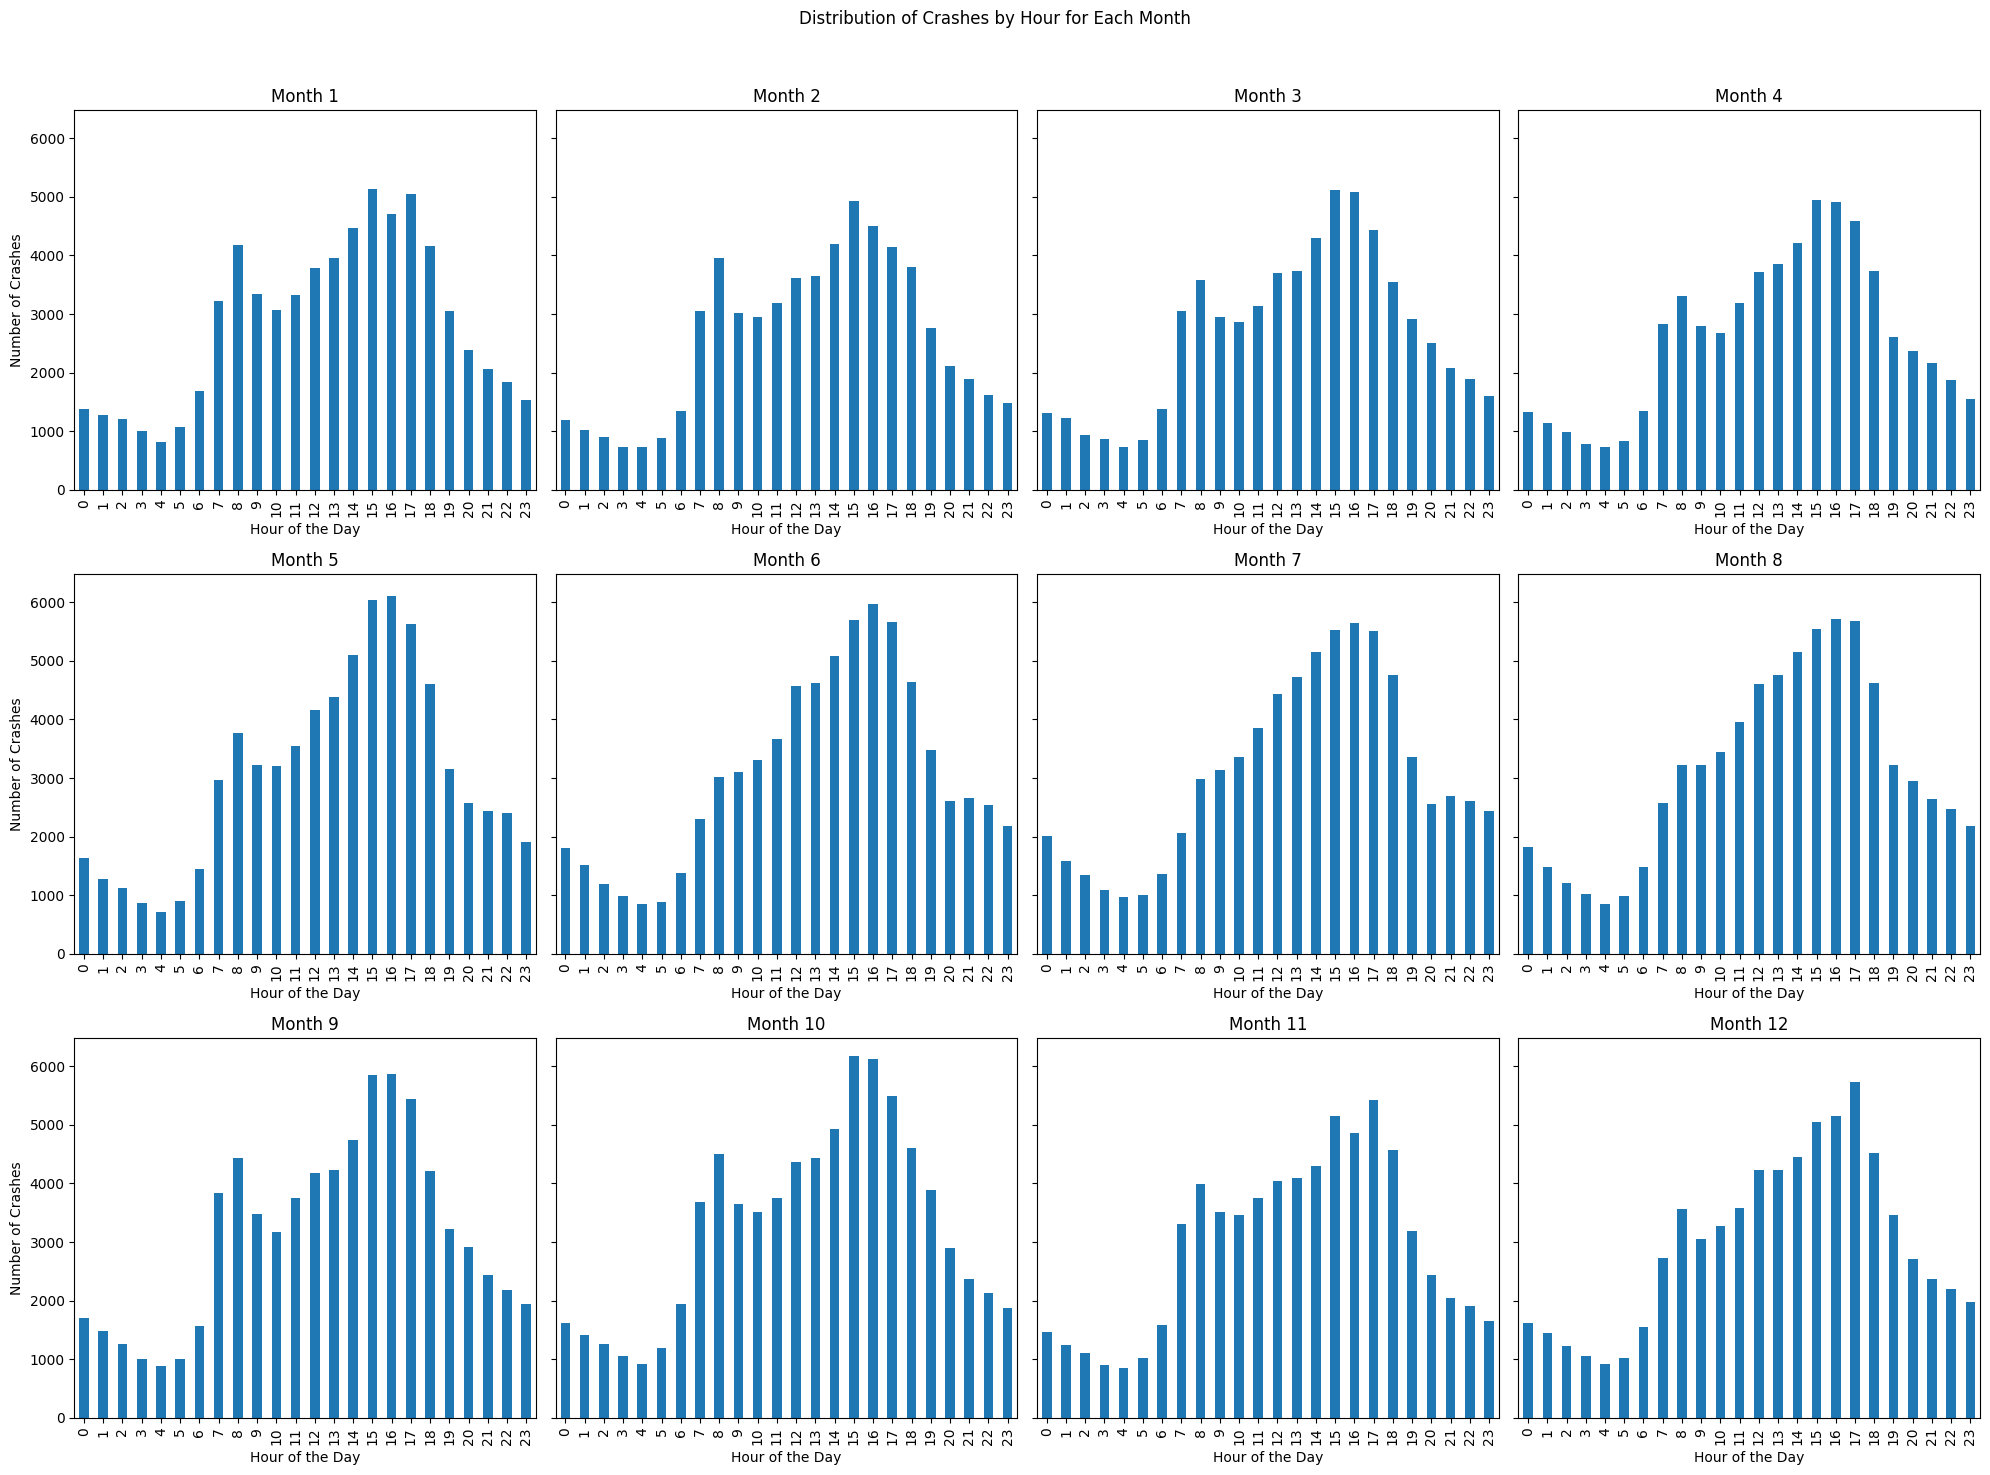

In [10]:
# distribution of crashes by hours per month
plt.figure(figsize=(14, 8))
crashes.groupby('CRASH_MONTH')['CRASH_HOUR'].value_counts().unstack().plot(kind='line', stacked=False)
plt.title('Distribution of Crashes by Hour per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.legend(title='Hour of the Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot the distribution of crashes by hour for each month
fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharey=True)
fig.suptitle('Distribution of Crashes by Hour for Each Month')

for month, ax in zip(range(1, 13), axes.flatten()):
    subset = crashes[crashes['CRASH_MONTH'] == month]
    subset['CRASH_HOUR'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f'Month {month}')
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Number of Crashes')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

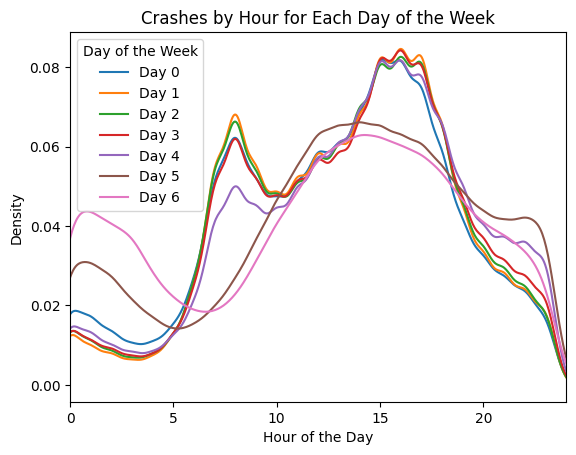

In [11]:
# Plot KDE for different days of the week
for day in range(0, 7):
    subset = crashes[crashes['CRASH_DAY_OF_WEEK'] == day]
    subset['CRASH_HOUR'].plot(kind='kde', label=f'Day {day}')

plt.title('Crashes by Hour for Each Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.xlim(0, 24)
plt.legend(title='Day of the Week')
plt.show()

---

# POSTED_SPEED_LIMIT



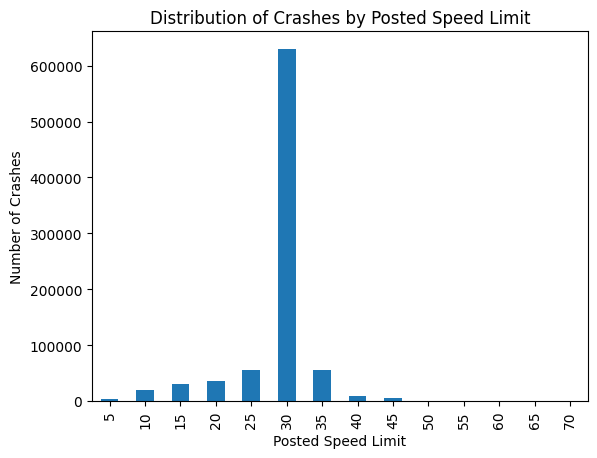

In [12]:
crashes['POSTED_SPEED_LIMIT'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Crashes by Posted Speed Limit')
plt.xlabel('Posted Speed Limit')
plt.ylabel('Number of Crashes')
plt.show()


In [13]:
# POSTED_SPEED_LIMIT value counts
crashes['POSTED_SPEED_LIMIT'].value_counts().sort_index()

POSTED_SPEED_LIMIT
5       4302
10     19880
15     30170
20     35250
25     54979
30    629555
35     56326
40      8352
45      5477
50       247
55       652
60        41
65        13
70         6
Name: count, dtype: int64

---

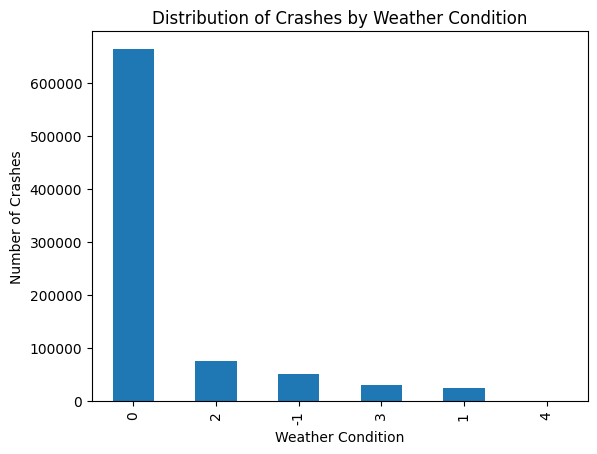

In [14]:
# weather severity distribution
crashes['WEATHER_SEVERITY'].value_counts().plot(kind='bar')
plt.title('Distribution of Crashes by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Crashes')
plt.show()

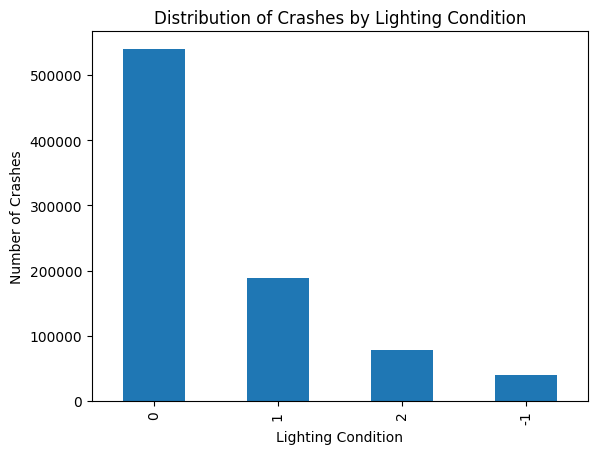

In [15]:
crashes['LIGHTING_SEVERITY'].value_counts().plot(kind='bar')
plt.title('Distribution of Crashes by Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Number of Crashes')
plt.show()

<Axes: xlabel='FIRST_CRASH_TYPE'>

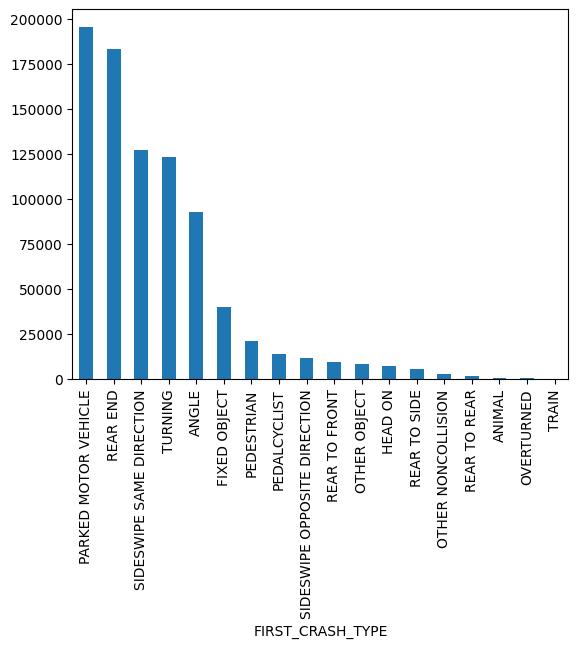

In [16]:
crashes['FIRST_CRASH_TYPE'].value_counts().plot(kind='bar')

<Axes: xlabel='TRAFFICWAY_TYPE'>

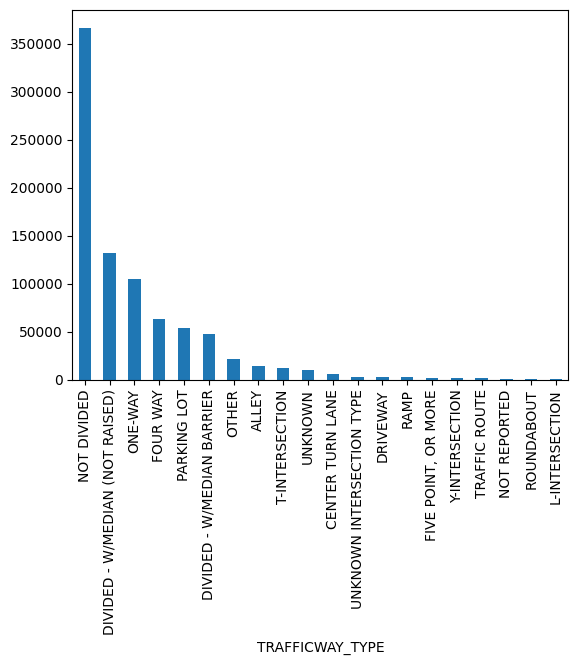

In [17]:
crashes['TRAFFICWAY_TYPE'].value_counts().plot(kind='bar')

<Axes: xlabel='ALIGNMENT'>

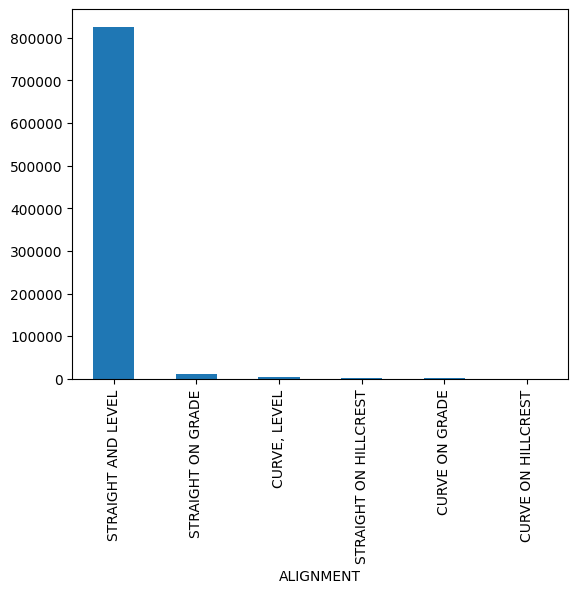

In [18]:
crashes['ALIGNMENT'].value_counts().plot(kind='bar')

we can drop this row due to the high unbalanced distribution

In [19]:
crashes.drop(columns=['ALIGNMENT'], inplace=True)

<Axes: xlabel='ROADWAY_SEVERITY'>

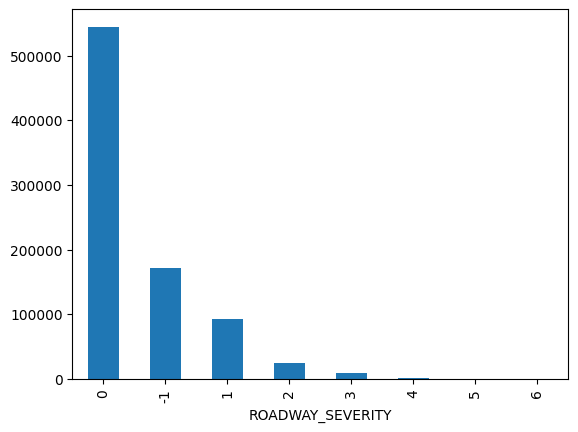

In [20]:
crashes['ROADWAY_SEVERITY'].value_counts().plot(kind='bar')

<Axes: xlabel='DAMAGE_SEVERITY'>

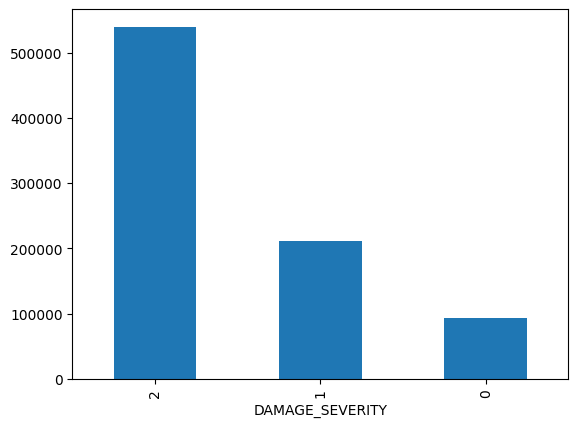

In [21]:
crashes['DAMAGE_SEVERITY'].value_counts().plot(kind='bar')

---

## NUM_UNITS

<Axes: xlabel='NUM_UNITS'>

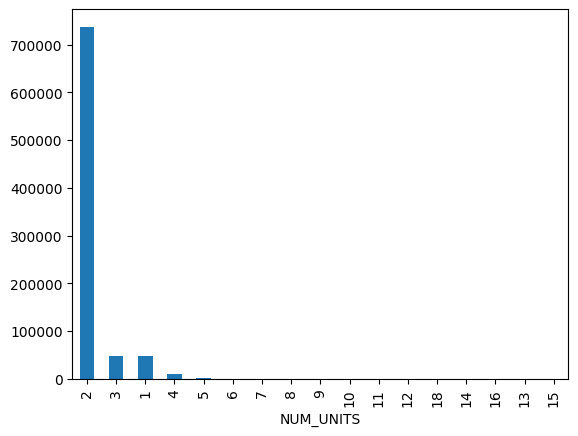

In [22]:
crashes['NUM_UNITS'].value_counts().plot(kind='bar')


<Axes: xlabel='INJURIES_TOTAL'>

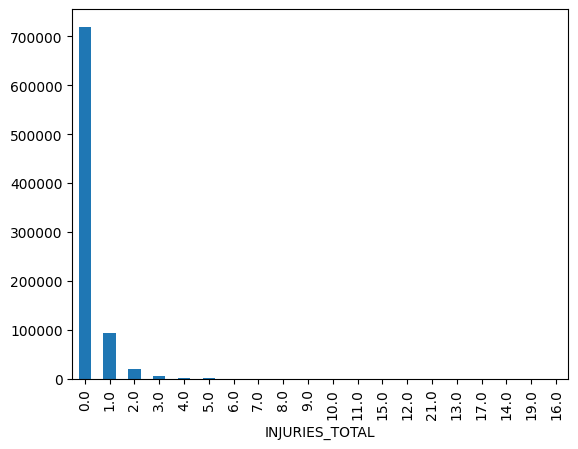

In [23]:
crashes['INJURIES_TOTAL'].value_counts().plot(kind='bar')

<Axes: xlabel='INJURIES_FATAL'>

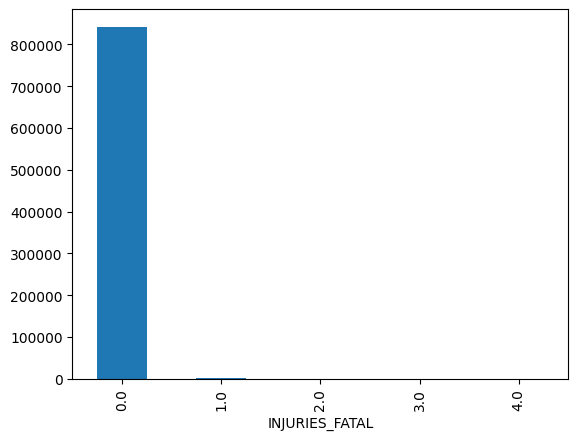

In [24]:
crashes['INJURIES_FATAL'].value_counts().plot(kind='bar')

<Axes: xlabel='INJURIES_INCAPACITATING'>

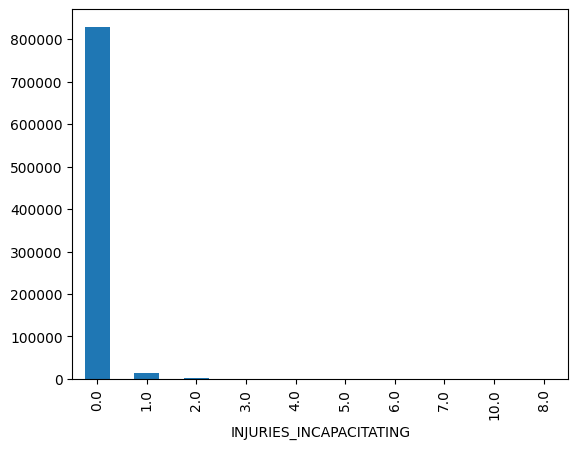

In [25]:
crashes['INJURIES_INCAPACITATING'].value_counts().plot(kind='bar')

<Axes: xlabel='INJURIES_NON_INCAPACITATING'>

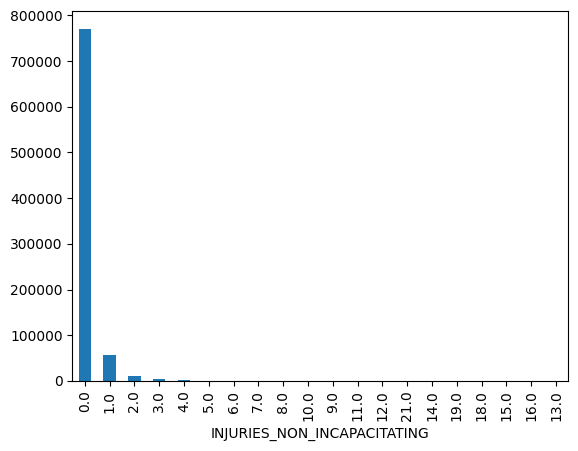

In [26]:
crashes['INJURIES_NON_INCAPACITATING'].value_counts().plot(kind='bar')

<Axes: xlabel='INJURIES_REPORTED_NOT_EVIDENT'>

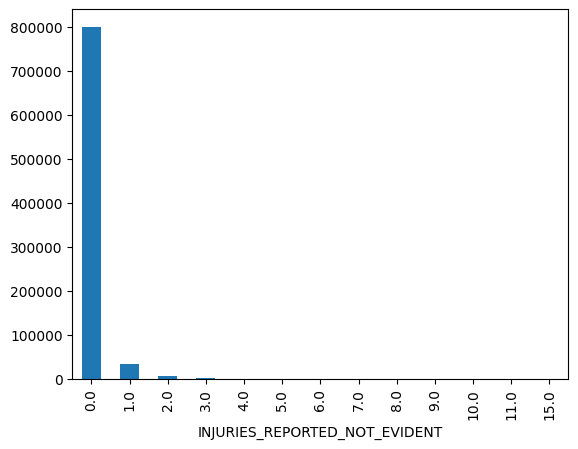

In [27]:
crashes['INJURIES_REPORTED_NOT_EVIDENT'].value_counts().plot(kind='bar')

---

# People Dataset

In [28]:
# people dataset
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440782 entries, 0 to 1440781
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1440782 non-null  object 
 1   PERSON_TYPE            1440782 non-null  object 
 2   CRASH_RECORD_ID        1440782 non-null  object 
 3   VEHICLE_ID             1440122 non-null  float64
 4   CRASH_DATE             1440782 non-null  object 
 5   CITY                   1091527 non-null  object 
 6   STATE                  1077638 non-null  object 
 7   ZIPCODE                1023578 non-null  object 
 8   SEX                    1440782 non-null  float64
 9   AGE                    1043579 non-null  float64
 10  DRIVERS_LICENSE_STATE  1084697 non-null  object 
 11  DRIVERS_LICENSE_CLASS  895776 non-null   object 
 12  INJURY_CLASSIFICATION  1440782 non-null  object 
 13  DRIVER_ACTION          1440782 non-null  object 
 14  DRIVER_VISION     

In [29]:
people = people[people['CRASH_RECORD_ID'].isin(crashes['CRASH_RECORD_ID'])]

In [30]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440782 entries, 0 to 1440781
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1440782 non-null  object 
 1   PERSON_TYPE            1440782 non-null  object 
 2   CRASH_RECORD_ID        1440782 non-null  object 
 3   VEHICLE_ID             1440122 non-null  float64
 4   CRASH_DATE             1440782 non-null  object 
 5   CITY                   1091527 non-null  object 
 6   STATE                  1077638 non-null  object 
 7   ZIPCODE                1023578 non-null  object 
 8   SEX                    1440782 non-null  float64
 9   AGE                    1043579 non-null  float64
 10  DRIVERS_LICENSE_STATE  1084697 non-null  object 
 11  DRIVERS_LICENSE_CLASS  895776 non-null   object 
 12  INJURY_CLASSIFICATION  1440782 non-null  object 
 13  DRIVER_ACTION          1440782 non-null  object 
 14  DRIVER_VISION     

In [31]:
people.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,2019-09-28 03:30:00,CHICAGO,IL,60651,1.0,25.0,IL,D,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,2020-04-13 22:50:00,CHICAGO,IL,60620,1.0,37.0,IL,NaN,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL
2,O848601,DRIVER,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,805348.0,2020-02-23 18:15:00,CHICAGO,IL,60625,0.0,34.0,IL,D,NO INDICATION OF INJURY,UNKNOWN,NOT OBSCURED,NORMAL
3,O877654,DRIVER,e9146986f4b0884d00ff3a54da5249263b4b36c15d01ce...,832624.0,2020-04-30 15:05:00,CHICAGO,IL,60620,1.0,53.0,IL,B,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,NORMAL
4,O879085,DRIVER,f15ccbd94a8e29ce8424882ce93061d4e1d0deb214acfe...,833984.0,2020-05-03 22:30:00,CALUMENT CITY,NaN,NaN,1.0,65.0,IL,D,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,NORMAL


---

## Age

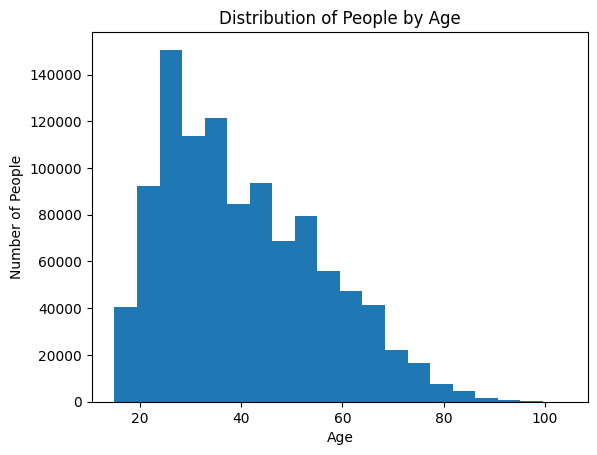

In [32]:
# age distribution
people['AGE'].plot(kind='hist', bins=20)
plt.title('Distribution of People by Age')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

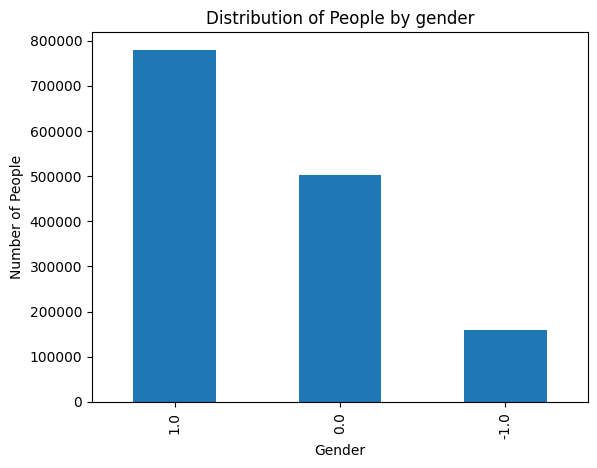

In [33]:
# SEX distributio

people['SEX'].value_counts().plot(kind='bar')
plt.title('Distribution of People by gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.show()

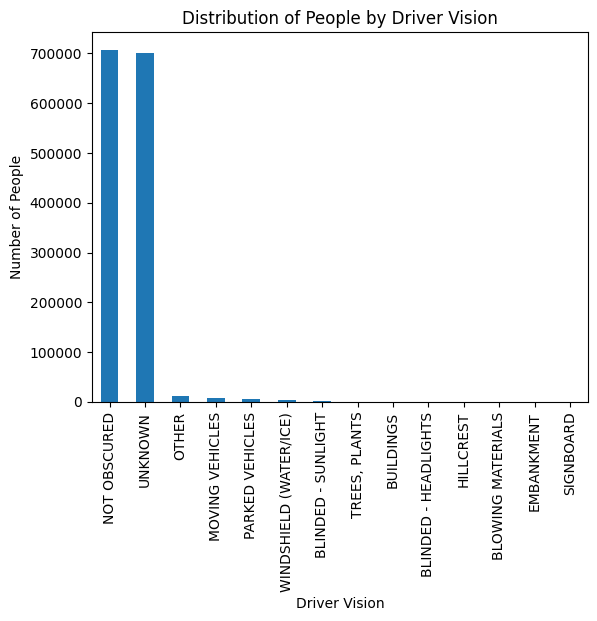

In [34]:
people['DRIVER_VISION'].value_counts().plot(kind='bar')
plt.title('Distribution of People by Driver Vision')
plt.xlabel('Driver Vision')
plt.ylabel('Number of People')
plt.show()


<Axes: xlabel='PHYSICAL_CONDITION'>

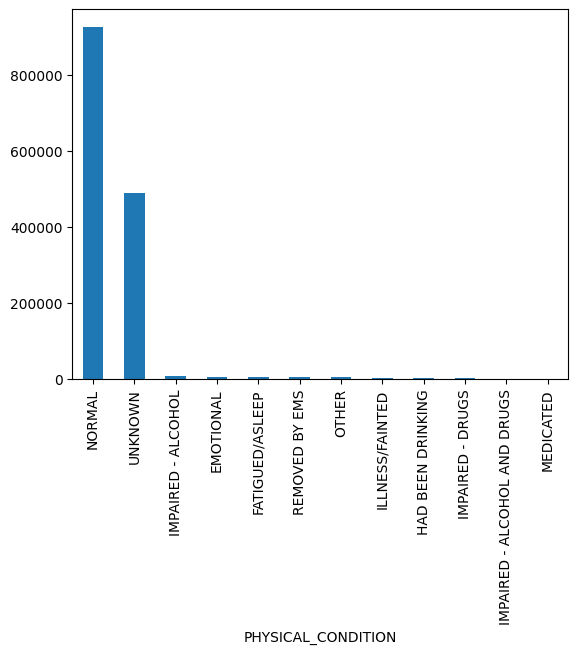

In [35]:
# PHYSICAL_CONDITION
people['PHYSICAL_CONDITION'].value_counts().plot(kind='bar')

---

In [36]:
# vehicles
vehicles.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726332 entries, 0 to 1726331
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   CRASH_UNIT_ID        1726332 non-null  int64  
 1   CRASH_RECORD_ID      1726332 non-null  object 
 2   VEHICLE_ID           1684588 non-null  float64
 3   CRASH_DATE           1726332 non-null  object 
 4   UNIT_NO              1726332 non-null  int64  
 5   UNIT_TYPE            1724193 non-null  object 
 6   NUM_PASSENGERS       257729 non-null   float64
 7   VEHICLE_YEAR         1417257 non-null  float64
 8   VEHICLE_DEFECT       1684588 non-null  object 
 9   VEHICLE_TYPE         1684588 non-null  object 
 10  MANEUVER             1684588 non-null  object 
 11  OCCUPANT_CNT         1684588 non-null  float64
 12  FIRST_CONTACT_POINT  1681478 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 171.2+ MB


In [37]:
# keep only the vehicles that are involved in the crashes

vehicles = vehicles[vehicles['CRASH_RECORD_ID'].isin(crashes['CRASH_RECORD_ID'])]



In [38]:
vehicles.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726332 entries, 0 to 1726331
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   CRASH_UNIT_ID        1726332 non-null  int64  
 1   CRASH_RECORD_ID      1726332 non-null  object 
 2   VEHICLE_ID           1684588 non-null  float64
 3   CRASH_DATE           1726332 non-null  object 
 4   UNIT_NO              1726332 non-null  int64  
 5   UNIT_TYPE            1724193 non-null  object 
 6   NUM_PASSENGERS       257729 non-null   float64
 7   VEHICLE_YEAR         1417257 non-null  float64
 8   VEHICLE_DEFECT       1684588 non-null  object 
 9   VEHICLE_TYPE         1684588 non-null  object 
 10  MANEUVER             1684588 non-null  object 
 11  OCCUPANT_CNT         1684588 non-null  float64
 12  FIRST_CONTACT_POINT  1681478 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 171.2+ MB


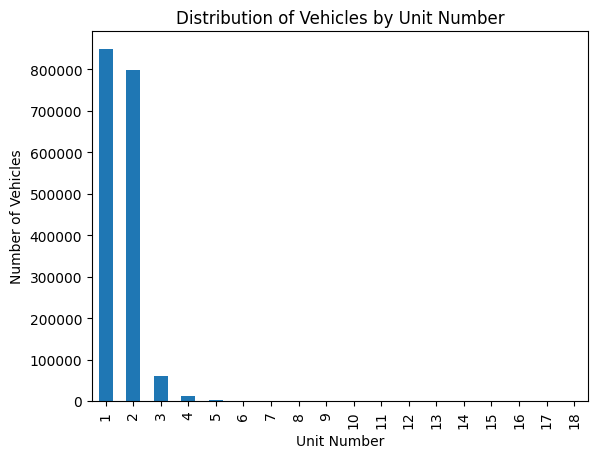

In [39]:
# UNIT_NO distribution
vehicles['UNIT_NO'].value_counts().plot(kind='bar')
plt.title('Distribution of Vehicles by Unit Number')
plt.xlabel('Unit Number')
plt.ylabel('Number of Vehicles')
plt.show()


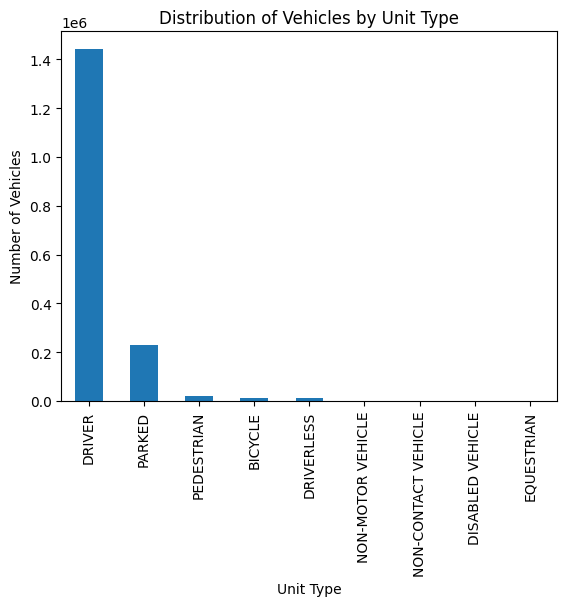

In [40]:
vehicles['UNIT_TYPE'].value_counts().plot(kind='bar')
plt.title('Distribution of Vehicles by Unit Type')
plt.xlabel('Unit Type')
plt.ylabel('Number of Vehicles')
plt.show()


In [41]:
vehicles = vehicles[vehicles['UNIT_TYPE'] == 'DRIVER']


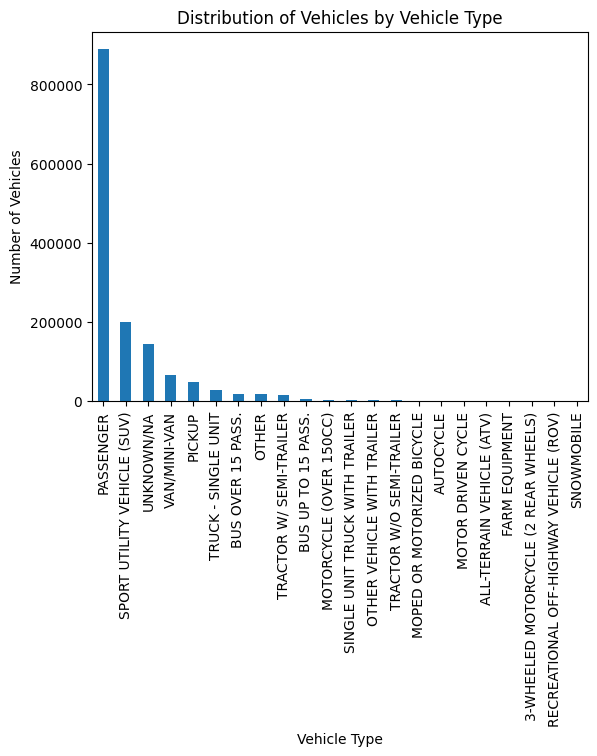

In [42]:
vehicles['VEHICLE_TYPE'].value_counts().plot(kind='bar')
plt.title('Distribution of Vehicles by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.show()

In [43]:
vehicles['VEHICLE_TYPE'].value_counts()

VEHICLE_TYPE
PASSENGER                                 888957
SPORT UTILITY VEHICLE (SUV)               200216
UNKNOWN/NA                                143838
VAN/MINI-VAN                               65228
PICKUP                                     47382
TRUCK - SINGLE UNIT                        28359
BUS OVER 15 PASS.                          18010
OTHER                                      17921
TRACTOR W/ SEMI-TRAILER                    14967
BUS UP TO 15 PASS.                          4501
MOTORCYCLE (OVER 150CC)                     3621
SINGLE UNIT TRUCK WITH TRAILER              2807
OTHER VEHICLE WITH TRAILER                  2009
TRACTOR W/O SEMI-TRAILER                    1870
MOPED OR MOTORIZED BICYCLE                   595
AUTOCYCLE                                    530
MOTOR DRIVEN CYCLE                           233
ALL-TERRAIN VEHICLE (ATV)                    152
FARM EQUIPMENT                                74
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          55
RECREAT

In [44]:
vehicle_categories = {
    "PASSENGER": "Passenger Vehicle",
    "SPORT UTILITY VEHICLE (SUV)": "Passenger Vehicle",
    "VAN/MINI-VAN": "Passenger Vehicle",
    "PICKUP": "Passenger Vehicle",
    
    "TRUCK - SINGLE UNIT": "Truck/Commercial",
    "SINGLE UNIT TRUCK WITH TRAILER": "Truck/Commercial",
    "TRACTOR W/ SEMI-TRAILER": "Truck/Commercial",
    "TRACTOR W/O SEMI-TRAILER": "Truck/Commercial",
    "OTHER VEHICLE WITH TRAILER": "Truck/Commercial",

    "BUS OVER 15 PASS.": "Public Transport",
    "BUS UP TO 15 PASS.": "Public Transport",

    "MOTORCYCLE (OVER 150CC)": "Motorcycle",
    "MOTOR DRIVEN CYCLE": "Motorcycle",
    "MOPED OR MOTORIZED BICYCLE": "Motorcycle",
    "AUTOCYCLE": "Motorcycle",
    "3-WHEELED MOTORCYCLE (2 REAR WHEELS)": "Motorcycle",

    "ALL-TERRAIN VEHICLE (ATV)": "Off-Road/Specialized",
    "RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)": "Off-Road/Specialized",
    "SNOWMOBILE": "Off-Road/Specialized",
    "FARM EQUIPMENT": "Off-Road/Specialized",

    "UNKNOWN/NA": "Unknown/Other",
    "OTHER": "Unknown/Other"
}

vehicles["CATEGORY"] = vehicles["VEHICLE_TYPE"].map(vehicle_categories)


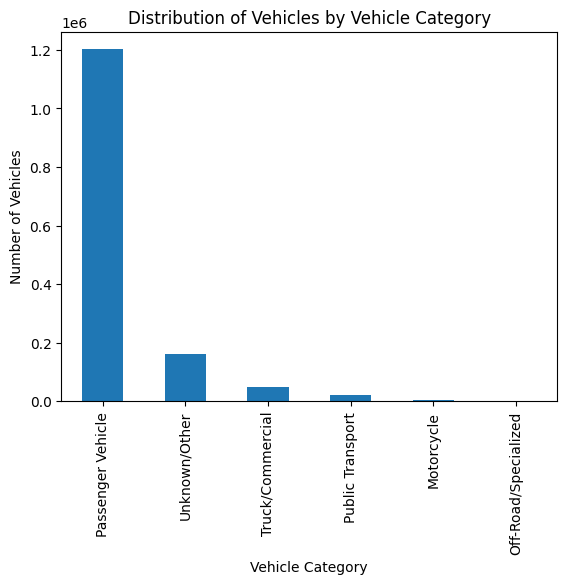

In [45]:
vehicles['CATEGORY'].value_counts().plot(kind='bar')
plt.title('Distribution of Vehicles by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('Number of Vehicles')
plt.show()


In [46]:
vehicles = vehicles[vehicles['CATEGORY'] != 'Unknown/Other']

In [47]:
# save the cleaned datasets

crashes.to_csv('dataset/crashes_cleaned.csv', index=False)
people.to_csv('dataset/people_cleaned.csv', index=False)
vehicles.to_csv('dataset/vehicles_cleaned.csv', index=False)

---

## dropping the missing values

In [48]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845250 entries, 0 to 845249
Data columns (total 56 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   CRASH_RECORD_ID                   845250 non-null  object        
 1   CRASH_DATE                        845250 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT                845250 non-null  int64         
 3   WEATHER_SEVERITY                  845250 non-null  int64         
 4   LIGHTING_SEVERITY                 845250 non-null  int64         
 5   FIRST_CRASH_TYPE                  845250 non-null  object        
 6   TRAFFICWAY_TYPE                   845250 non-null  object        
 7   ROADWAY_SEVERITY                  845250 non-null  int64         
 8   CRASH_TYPE                        845250 non-null  object        
 9   DAMAGE_SEVERITY                   845250 non-null  int64         
 10  PRIM_CONTRIBUTORY_CAUSE         

In [49]:
crashes = crashes.dropna()

In [50]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 843358 entries, 0 to 845249
Data columns (total 56 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   CRASH_RECORD_ID                   843358 non-null  object        
 1   CRASH_DATE                        843358 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT                843358 non-null  int64         
 3   WEATHER_SEVERITY                  843358 non-null  int64         
 4   LIGHTING_SEVERITY                 843358 non-null  int64         
 5   FIRST_CRASH_TYPE                  843358 non-null  object        
 6   TRAFFICWAY_TYPE                   843358 non-null  object        
 7   ROADWAY_SEVERITY                  843358 non-null  int64         
 8   CRASH_TYPE                        843358 non-null  object        
 9   DAMAGE_SEVERITY                   843358 non-null  int64         
 10  PRIM_CONTRIBUTORY_CAUSE           843

In [51]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440782 entries, 0 to 1440781
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1440782 non-null  object 
 1   PERSON_TYPE            1440782 non-null  object 
 2   CRASH_RECORD_ID        1440782 non-null  object 
 3   VEHICLE_ID             1440122 non-null  float64
 4   CRASH_DATE             1440782 non-null  object 
 5   CITY                   1091527 non-null  object 
 6   STATE                  1077638 non-null  object 
 7   ZIPCODE                1023578 non-null  object 
 8   SEX                    1440782 non-null  float64
 9   AGE                    1043579 non-null  float64
 10  DRIVERS_LICENSE_STATE  1084697 non-null  object 
 11  DRIVERS_LICENSE_CLASS  895776 non-null   object 
 12  INJURY_CLASSIFICATION  1440782 non-null  object 
 13  DRIVER_ACTION          1440782 non-null  object 
 14  DRIVER_VISION     

In [52]:
# Compute the mean age for each sex
age_by_sex = people.groupby("SEX")["AGE"].median()
print(age_by_sex)


SEX
-1.0    36.0
 0.0    36.0
 1.0    39.0
Name: AGE, dtype: float64


In [53]:
# Map values
sex_mapping = {-1: "Other", 0: "Female", 1: "Male"}
people["SEX"] = people["SEX"].map(sex_mapping)

# Verify mapping
print(people["SEX"].unique()) 


['Male' 'Female' 'Other']


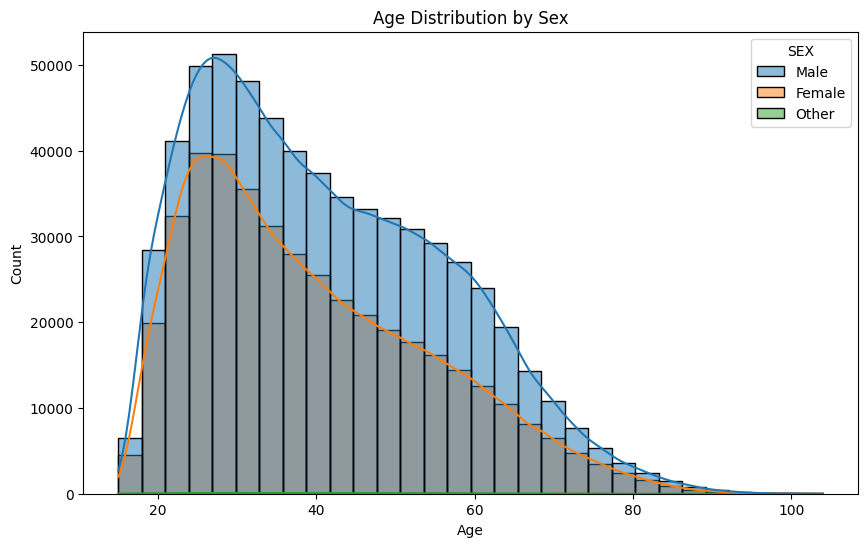

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot histogram
sns.histplot(data=people, x="AGE", hue="SEX", bins=30, kde=True, alpha=0.5)

# Labels
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Sex")

# Show plot
plt.show()

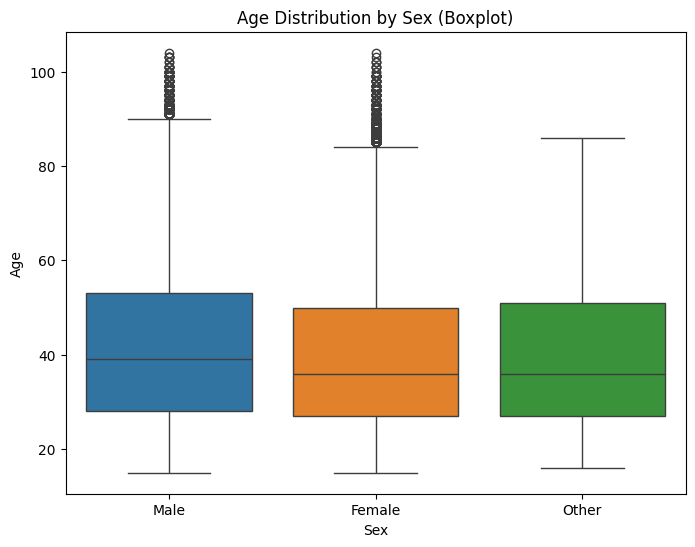

In [55]:
plt.figure(figsize=(8, 6))

# Boxplot
sns.boxplot(data=people, x="SEX", y="AGE", hue="SEX")

# Labels
plt.xlabel("Sex")
plt.ylabel("Age")
plt.title("Age Distribution by Sex (Boxplot)")

plt.show()


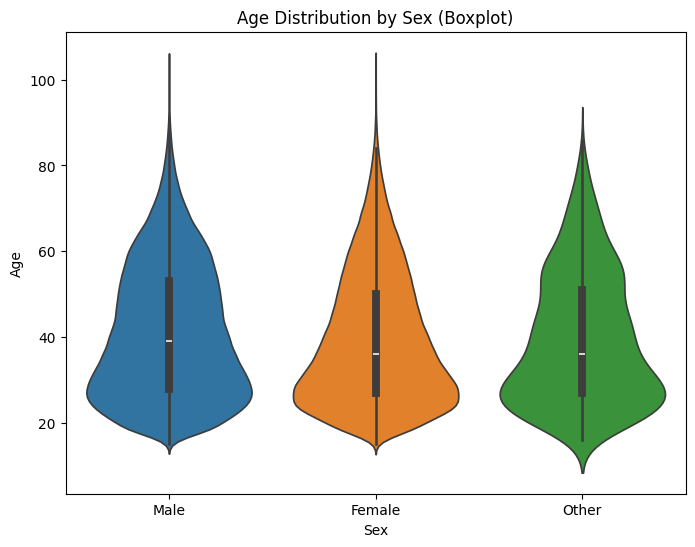

In [56]:
plt.figure(figsize=(8, 6))

# Boxplot
sns.violinplot(data=people, x="SEX", y="AGE", hue='SEX')

# Labels
plt.xlabel("Sex")
plt.ylabel("Age")
plt.title("Age Distribution by Sex (Boxplot)")

plt.show()


In [57]:
people["GENDER_UNKNOWN"] = (people["SEX"] == -1).astype(int)
people["GENDER_FEMALE"] = (people["SEX"] == 0).astype(int)
people["GENDER_MALE"] = (people["SEX"] == 1).astype(int)


--- 

## Merging Crashes and People

In [58]:
# merge the people dataset with the crashes dataset, taking the average for AGE and the sum for SEX_UNKNOWN SEX_FEMALE, SEX_MALE'
people_grouped = people.groupby('CRASH_RECORD_ID').agg({'GENDER_UNKNOWN': 'sum', 'GENDER_FEMALE': 'sum', 'GENDER_MALE': 'sum', 'AGE': 'mean'}).reset_index()


crashes = pd.merge(crashes, people_grouped, on='CRASH_RECORD_ID', how='left')

crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843358 entries, 0 to 843357
Data columns (total 60 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   CRASH_RECORD_ID                   843358 non-null  object        
 1   CRASH_DATE                        843358 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT                843358 non-null  int64         
 3   WEATHER_SEVERITY                  843358 non-null  int64         
 4   LIGHTING_SEVERITY                 843358 non-null  int64         
 5   FIRST_CRASH_TYPE                  843358 non-null  object        
 6   TRAFFICWAY_TYPE                   843358 non-null  object        
 7   ROADWAY_SEVERITY                  843358 non-null  int64         
 8   CRASH_TYPE                        843358 non-null  object        
 9   DAMAGE_SEVERITY                   843358 non-null  int64         
 10  PRIM_CONTRIBUTORY_CAUSE         

In [59]:
#percentage of missing values   
crashes.isnull().mean() * 100

CRASH_RECORD_ID                      0.000000
CRASH_DATE                           0.000000
POSTED_SPEED_LIMIT                   0.000000
WEATHER_SEVERITY                     0.000000
LIGHTING_SEVERITY                    0.000000
FIRST_CRASH_TYPE                     0.000000
TRAFFICWAY_TYPE                      0.000000
ROADWAY_SEVERITY                     0.000000
CRASH_TYPE                           0.000000
DAMAGE_SEVERITY                      0.000000
PRIM_CONTRIBUTORY_CAUSE              0.000000
SEC_CONTRIBUTORY_CAUSE               0.000000
BEAT_OF_OCCURRENCE                   0.000000
STREET_NO                            0.000000
STREET_DIRECTION                     0.000000
STREET_NAME                          0.000000
LATITUDE                             0.000000
LONGITUDE                            0.000000
NUM_UNITS                            0.000000
MOST_SEVERE_INJURY                   0.000000
INJURIES_TOTAL                       0.000000
INJURIES_FATAL                    

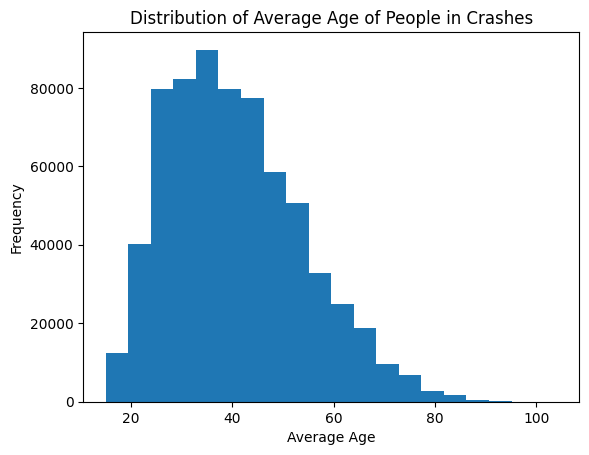

In [60]:
# average age distribution
crashes['AGE'].plot(kind='hist', bins=20)
plt.title('Distribution of Average Age of People in Crashes')
plt.xlabel('Average Age')

plt.show()

In [61]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1280282 entries, 0 to 1726331
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   CRASH_UNIT_ID        1280282 non-null  int64  
 1   CRASH_RECORD_ID      1280282 non-null  object 
 2   VEHICLE_ID           1279595 non-null  float64
 3   CRASH_DATE           1280282 non-null  object 
 4   UNIT_NO              1280282 non-null  int64  
 5   UNIT_TYPE            1280282 non-null  object 
 6   NUM_PASSENGERS       230210 non-null   float64
 7   VEHICLE_YEAR         1142886 non-null  float64
 8   VEHICLE_DEFECT       1279595 non-null  object 
 9   VEHICLE_TYPE         1279595 non-null  object 
 10  MANEUVER             1279595 non-null  object 
 11  OCCUPANT_CNT         1279595 non-null  float64
 12  FIRST_CONTACT_POINT  1277304 non-null  object 
 13  CATEGORY             1279595 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 146.5+

In [62]:
# 1 column for each vehicle category
vehicles = pd.get_dummies(vehicles, columns=['CATEGORY'])

vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1280282 entries, 0 to 1726331
Data columns (total 18 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH_UNIT_ID                  1280282 non-null  int64  
 1   CRASH_RECORD_ID                1280282 non-null  object 
 2   VEHICLE_ID                     1279595 non-null  float64
 3   CRASH_DATE                     1280282 non-null  object 
 4   UNIT_NO                        1280282 non-null  int64  
 5   UNIT_TYPE                      1280282 non-null  object 
 6   NUM_PASSENGERS                 230210 non-null   float64
 7   VEHICLE_YEAR                   1142886 non-null  float64
 8   VEHICLE_DEFECT                 1279595 non-null  object 
 9   VEHICLE_TYPE                   1279595 non-null  object 
 10  MANEUVER                       1279595 non-null  object 
 11  OCCUPANT_CNT                   1279595 non-null  float64
 12  FIRST_CONTACT_POINT

In [63]:
# MERGE THE VEHICLES DATASET WITH THE CRASHES DATASET, SUMMING THE CATEGORY COLUMNS and only adding the category columns
vehicles_grouped = vehicles.groupby('CRASH_RECORD_ID').sum().reset_index()
columns = ['CRASH_RECORD_ID', 'CATEGORY_Motorcycle', 'CATEGORY_Off-Road/Specialized', 'CATEGORY_Passenger Vehicle', 'CATEGORY_Public Transport', 'CATEGORY_Truck/Commercial']

vehicles_grouped = vehicles_grouped[columns]

crashes = pd.merge(crashes, vehicles_grouped, on='CRASH_RECORD_ID', how='left')


In [64]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843358 entries, 0 to 843357
Data columns (total 65 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   CRASH_RECORD_ID                   843358 non-null  object        
 1   CRASH_DATE                        843358 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT                843358 non-null  int64         
 3   WEATHER_SEVERITY                  843358 non-null  int64         
 4   LIGHTING_SEVERITY                 843358 non-null  int64         
 5   FIRST_CRASH_TYPE                  843358 non-null  object        
 6   TRAFFICWAY_TYPE                   843358 non-null  object        
 7   ROADWAY_SEVERITY                  843358 non-null  int64         
 8   CRASH_TYPE                        843358 non-null  object        
 9   DAMAGE_SEVERITY                   843358 non-null  int64         
 10  PRIM_CONTRIBUTORY_CAUSE         

In [65]:
crashes_no_na = crashes.dropna()

In [66]:
crashes_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657220 entries, 1 to 843356
Data columns (total 65 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   CRASH_RECORD_ID                   657220 non-null  object        
 1   CRASH_DATE                        657220 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT                657220 non-null  int64         
 3   WEATHER_SEVERITY                  657220 non-null  int64         
 4   LIGHTING_SEVERITY                 657220 non-null  int64         
 5   FIRST_CRASH_TYPE                  657220 non-null  object        
 6   TRAFFICWAY_TYPE                   657220 non-null  object        
 7   ROADWAY_SEVERITY                  657220 non-null  int64         
 8   CRASH_TYPE                        657220 non-null  object        
 9   DAMAGE_SEVERITY                   657220 non-null  int64         
 10  PRIM_CONTRIBUTORY_CAUSE           657

In [71]:
# save the cleaned datasets
crashes.to_csv('dataset/crashes_cleaned.csv', index=False)
crashes_no_na.to_csv('dataset/crashes_cleaned_no_na.csv', index=False)
people.to_csv('dataset/people_cleaned.csv', index=False)
vehicles.to_csv('dataset/vehicles_cleaned.csv', index=False)

---

# creation of crash profile

In [72]:
# load crashes
crashes = pd.read_csv('dataset/crashes_cleaned.csv')

In [73]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657220 entries, 0 to 657219
Data columns (total 65 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CRASH_RECORD_ID                   657220 non-null  object 
 1   CRASH_DATE                        657220 non-null  object 
 2   POSTED_SPEED_LIMIT                657220 non-null  int64  
 3   WEATHER_SEVERITY                  657220 non-null  int64  
 4   LIGHTING_SEVERITY                 657220 non-null  int64  
 5   FIRST_CRASH_TYPE                  657220 non-null  object 
 6   TRAFFICWAY_TYPE                   657220 non-null  object 
 7   ROADWAY_SEVERITY                  657220 non-null  int64  
 8   CRASH_TYPE                        657220 non-null  object 
 9   DAMAGE_SEVERITY                   657220 non-null  int64  
 10  PRIM_CONTRIBUTORY_CAUSE           657220 non-null  object 
 11  SEC_CONTRIBUTORY_CAUSE            657220 non-null  o

## Creation of Profile

In [80]:
# Ensure proper data types
crashes["CRASH_YEAR"] = crashes["CRASH_YEAR"].astype(int)
crashes["CRASH_MONTH"] = crashes["CRASH_MONTH"].astype(int)
crashes["BEAT_OF_OCCURRENCE"] = crashes["BEAT_OF_OCCURRENCE"].astype(float)
crashes["AGE"] = pd.to_numeric(crashes["AGE"], errors="coerce")

# Identify all categorical columns dynamically (all starting with 'CATEGORY_', 'LIGHTING_CATEGORY_', 'ROADWAY_SURFACE_CATEGORY_', etc.)
categorical_columns = [col for col in crashes.columns if col.startswith(
    ("GENDER_","INJURIES_", "CATEGORY_", "WEATHER_CATEGORY_", "LIGHTING_CATEGORY_", "ROADWAY_SURFACE_CATEGORY_", "ROAD_DEFECT_CATEGORY_", "DAMAGE_CATEGORY_"))]
crashes[categorical_columns] = crashes[categorical_columns].apply(pd.to_numeric, errors="coerce")

# Grouping by year, month, and police department
incident_profile = crashes.groupby(["CRASH_YEAR", "CRASH_MONTH", "BEAT_OF_OCCURRENCE"]).agg(
    avg_age=("AGE", "mean"),
    avg_speed_limit=("POSTED_SPEED_LIMIT", "mean"),
    total_crashes=("CRASH_RECORD_ID", "count"),
    **{f"sum_{col.lower()}": (col, "sum") for col in categorical_columns}
).reset_index()

# Save the result to a CSV file
incident_profile.to_csv("incident_profile.csv", index=False)

# Display the first few rows
incident_profile.head()


,CRASH_YEAR,CRASH_MONTH,BEAT_OF_OCCURRENCE,avg_age,avg_speed_limit,total_crashes,sum_injuries_total,sum_injuries_fatal,sum_injuries_incapacitating,sum_injuries_non_incapacitating,...,sum_damage_category_low,sum_damage_category_medium,sum_gender_unknown,sum_gender_female,sum_gender_male,sum_category_motorcycle,sum_category_off-road/specialized,sum_category_passenger vehicle,sum_category_public transport,sum_category_truck/commercial
0,2017,1,111.0,49.342105,30.263158,19,0.0,0.0,0.0,0.0,...,3,6,0.0,0.0,0.0,0.0,0.0,28.0,1.0,3.0
1,2017,1,112.0,44.968750,30.000000,16,0.0,0.0,0.0,0.0,...,5,6,0.0,0.0,0.0,0.0,0.0,30.0,0.0,2.0
2,2017,1,113.0,44.388889,30.277778,18,0.0,0.0,0.0,0.0,...,4,2,0.0,0.0,0.0,0.0,0.0,36.0,1.0,0.0
3,2017,1,114.0,42.208333,31.041667,48,2.0,0.0,2.0,0.0,...,14,14,0.0,0.0,0.0,0.0,0.0,78.0,2.0,3.0
4,2017,1,121.0,39.703125,30.156250,32,0.0,0.0,0.0,0.0,...,4,6,0.0,0.0,0.0,0.0,0.0,53.0,2.0,3.0
